In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\DL_TSA\SBUX.US_D1.csv")
df.rename(columns={"datetime":"date"}, inplace=True)

In [3]:
df = df.loc[:,["date","close"]]
df.tail()

,date,close
6610,2024-02-08,96.66
6611,2024-02-09,97.29
6612,2024-02-10,97.30
6613,2024-02-12,95.47
6614,2024-02-13,93.87


<Axes: xlabel='date'>

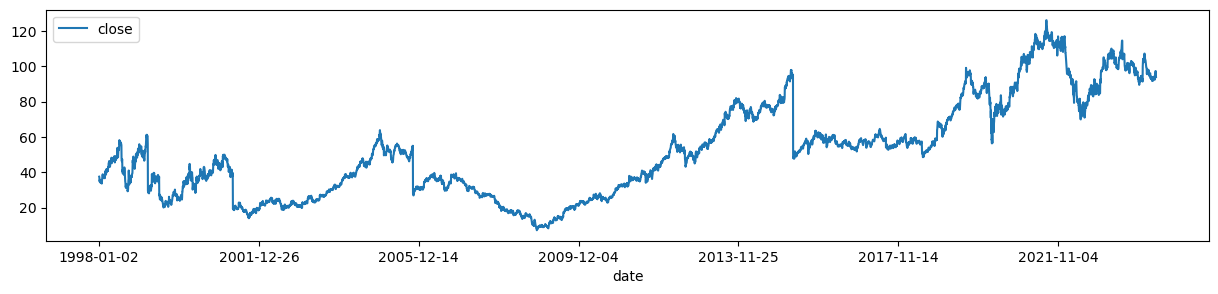

In [4]:
df.plot.line(x = 'date' ,y = 'close',figsize=(15,3))

# Stationary  -- ADF Test 

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 


In [5]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['close'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   -1.517911
p-value                           0.524633
#lags used                        9.000000
number of observations used    6605.000000
dtype: float64

* we do not Reject Ho
* The data is  non-stationary

# Differencing  ( d )

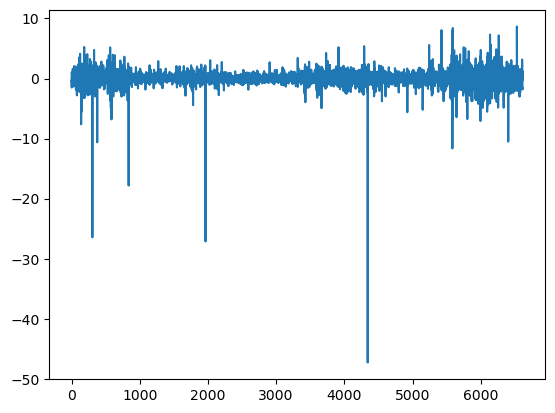

In [6]:
from matplotlib import pyplot

diff = df.close.diff()
pyplot.plot(diff)
pyplot.show()

In [7]:
df['diff_1'] = df['close'].diff()
df['diff_2'] = df['diff_1'].diff()

df.head()

,date,close,diff_1,diff_2
0,1998-01-02,37.50,NaN,NaN
1,1998-01-05,37.13,-0.37,NaN
2,1998-01-06,35.63,-1.50,-1.13
3,1998-01-07,34.69,-0.94,0.56
4,1998-01-08,35.76,1.07,2.01


In [8]:
import numpy as np
np.var(df)  # d = 1

TypeError: could not convert string to float: '1998-01-02'

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

* We Reject Ho
* The data is stationary

# ACF & PACF Plot

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['close'],lags=200, ax=ax[0],zero=False)
plot_pacf(df['close'],lags=10, ax=ax[1],zero=False)
plt.show()

* Order (p,d,q) = (1,1,0)

# ARIMA MODEL - Manual 

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = ARIMA(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

# ARIMA MODEL -- Auto ( Grid Search )

In [10]:
# !pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --- ----------------------------------- 61.4/614.7 kB 812.7 kB/s eta 0:00:01
   --------------- ------------------------ 235.5/614.7 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
df.head()

,date,close,diff_1,diff_2
0,1998-01-02,37.50,NaN,NaN
1,1998-01-05,37.13,-0.37,NaN
2,1998-01-06,35.63,-1.50,-1.13
3,1998-01-07,34.69,-0.94,0.56
4,1998-01-08,35.76,1.07,2.01


In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.close,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72614.756, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=63642.187, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22253.699, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22255.548, Time=1.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22255.682, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=55960.247, Time=2.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22253.918, Time=1.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22250.577, Time=0.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=53688.720, Time=1.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22252.542, Time=2.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22252.547, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   :

# Fitted Value

In [13]:
import numpy as np
df['Forecast']=np.round(model.predict_in_sample(),0)
df.iloc[:,[0,1,4]]

,date,close,Forecast
0,1998-01-02,37.50,55.0
1,1998-01-05,37.13,38.0
2,1998-01-06,35.63,37.0
3,1998-01-07,34.69,36.0
4,1998-01-08,35.76,35.0
...,...,...,...
6610,2024-02-08,96.66,95.0
6611,2024-02-09,97.29,97.0
6612,2024-02-10,97.30,97.0
6613,2024-02-12,95.47,97.0


# Model plot

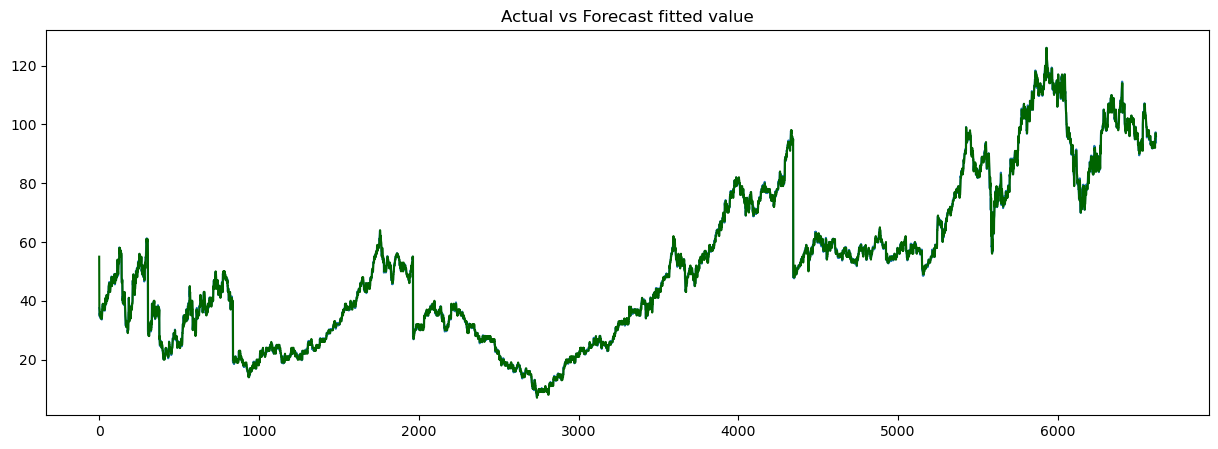

In [14]:
# Plot
plt.figure(figsize=(15,5))
plt.plot(df.close)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [15]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.close,df.Forecast)

{'mape': 1.699921799878221}

#  Forecast - Future Month


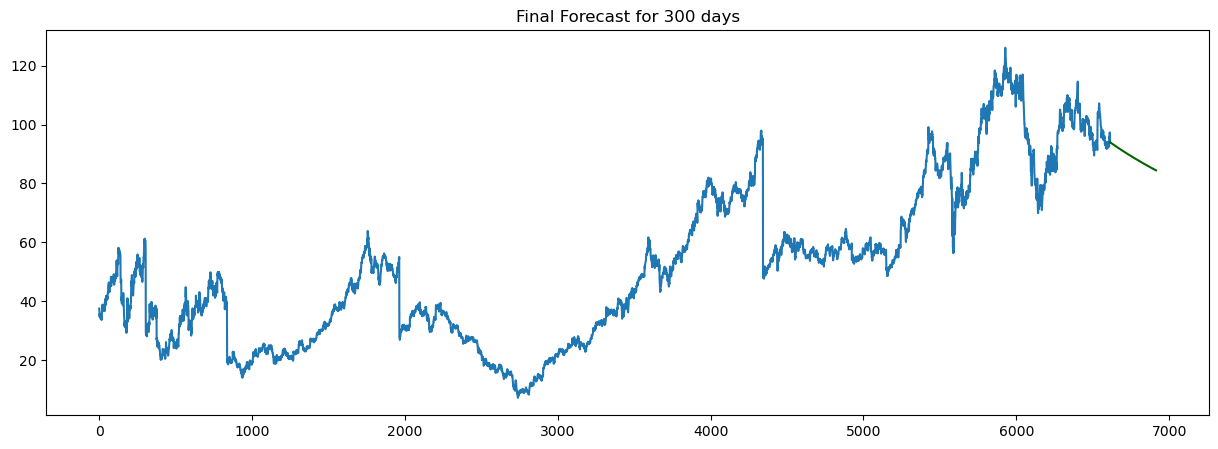

In [16]:
n_periods=300
fc = model.predict(n_periods=n_periods)
index_of_fc = np.arange(len(df.close), len(df.close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.figure(figsize=(15,5))
plt.plot(df.close)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast for 300 days")
plt.show()

In [17]:
fc.head()

6615    93.900907
6616    93.864602
6617    93.828332
6618    93.792095
6619    93.755893
dtype: float64

# SARIMAX -- Auto ( Grid Search )

In [18]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df.close,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2, # P= 0,1,2
                      D=0,max_D=1,       # D = 0,1
                      start_Q=0,max_Q=2, # Q = 0,1,2
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=62423.968, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=46547.733, Time=5.70 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=72614.756, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=53688.720, Time=1.80 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=32452.799, Time=25.83 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=32349.877, Time=20.90 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=43.69 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=54.37 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=11.44 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=27016.824, Time=3.96 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=22250.577, Time=0.84 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=22251.012, Time=5.69 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=15.28 sec
 ARIMA(1,0,0)(0,0,0)[12] inte

# Fitted Value

In [19]:
df['S_Forecast']=smodel.predict_in_sample()
df.iloc[:,[0,1,5]]

,date,close,S_Forecast
0,1998-01-02,37.50,55.243384
1,1998-01-05,37.13,37.518151
2,1998-01-06,35.63,37.162927
3,1998-01-07,34.69,35.711383
4,1998-01-08,35.76,34.751255
...,...,...,...
6610,2024-02-08,96.66,95.327319
6611,2024-02-09,97.29,96.566365
6612,2024-02-10,97.30,97.220790
6613,2024-02-12,95.47,97.257250


# Model plot

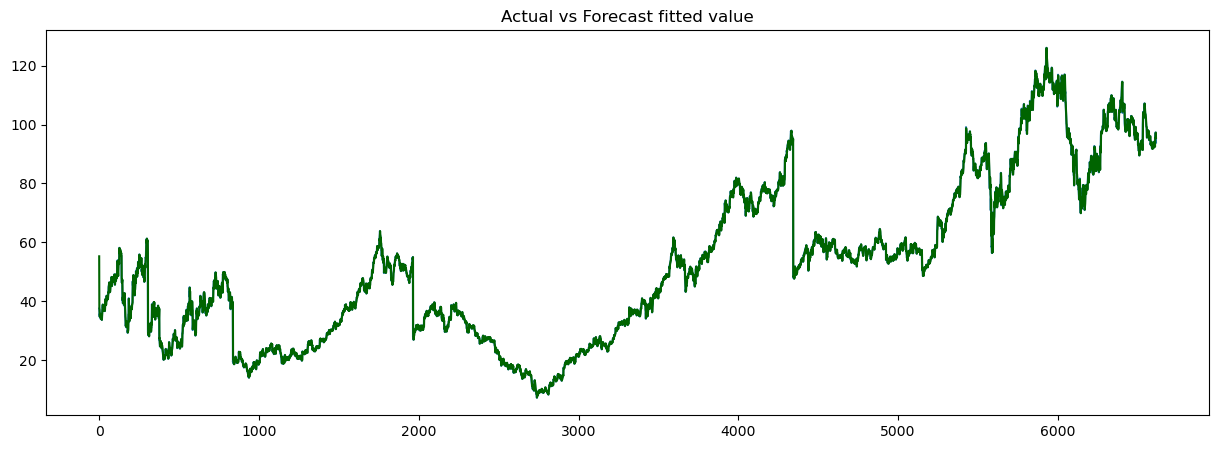

In [20]:
# Plot
plt.figure(figsize=(15,5))
plt.plot(df.close)
plt.plot(df.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [21]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.close,df.S_Forecast)

{'mape': 1.5486856192952334}

#  Forecast


In [22]:
n_periods=300
future_Forecast = smodel.predict(n_periods=n_periods)
future_Forecast

6615    93.900907
6616    93.864602
6617    93.828332
6618    93.792095
6619    93.755893
          ...    
6910    84.542783
6911    84.515267
6912    84.487777
6913    84.460312
6914    84.432874
Length: 300, dtype: float64

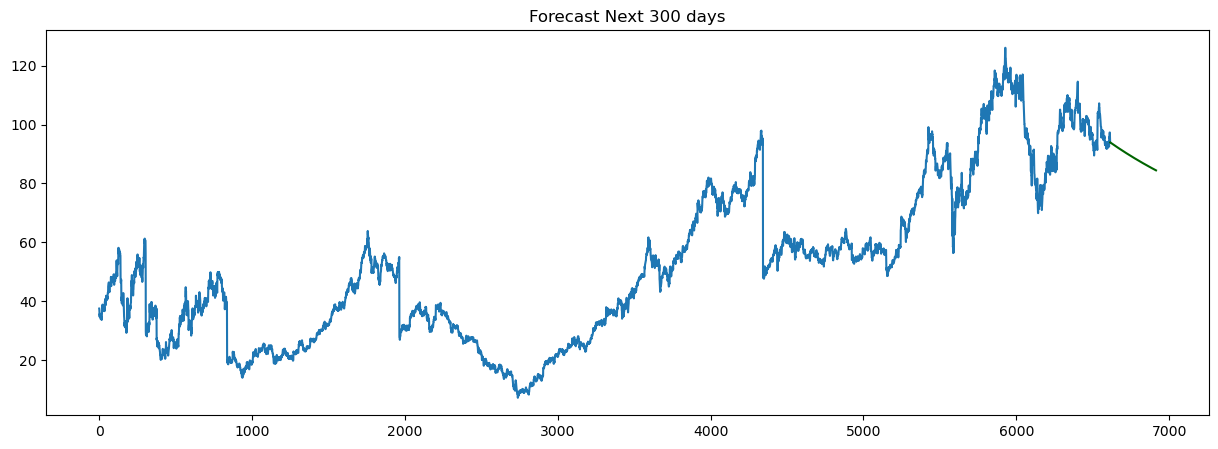

In [23]:
index_of_future_Forecast = np.arange(len(df.close), len(df.close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(future_Forecast, index=index_of_future_Forecast)

# Plot
plt.figure(figsize=(15,5))
plt.plot(df.close)
plt.plot(fc_series, color='darkgreen')
plt.title("Forecast Next 300 days")
plt.show()

# Finished